In [1]:
#workshop 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
sb.set()

cols = ['preg', 'plas', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age', 'class']
df = pd.read_csv('/Users/apple/Desktop/my_machine_learning/csv/pima-indians-diabetes.csv', names=cols)
df.head()

preg  plas  pres  skin  insu   bmi   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [6]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
bmi      0
pedi     0
age      0
class    0
dtype: int64

In [7]:
df.describe().round(2)

preg    plas    pres    skin    insu     bmi    pedi     age   class
count  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00
mean     3.85  120.89   69.11   20.54   79.80   31.99    0.47   33.24    0.35
std      3.37   31.97   19.36   15.95  115.24    7.88    0.33   11.76    0.48
min      0.00    0.00    0.00    0.00    0.00    0.00    0.08   21.00    0.00
25%      1.00   99.00   62.00    0.00    0.00   27.30    0.24   24.00    0.00
50%      3.00  117.00   72.00   23.00   30.50   32.00    0.37   29.00    0.00
75%      6.00  140.25   80.00   32.00  127.25   36.60    0.63   41.00    1.00
max     17.00  199.00  122.00   99.00  846.00   67.10    2.42   81.00    1.00

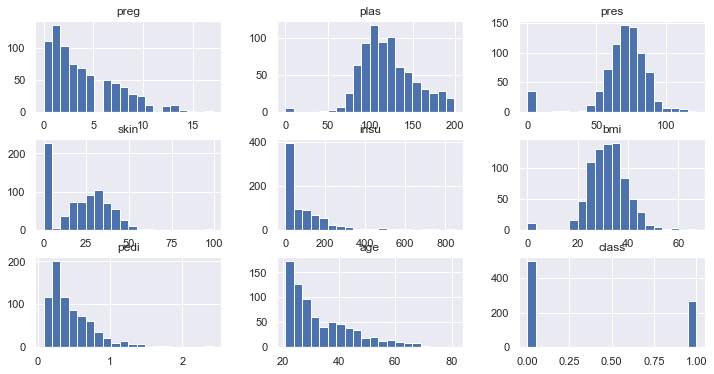

In [8]:
df.hist(bins=20, figsize=(12, 6))
plt.show()

In [9]:
sb.pairplot(df)
plt.show()

/Users/apple/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


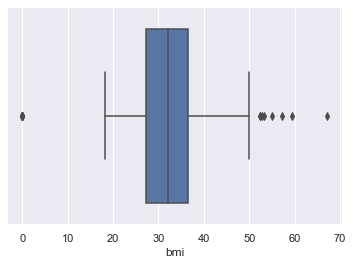

In [10]:
sb.boxplot(df['bmi'])
plt.show()

In [13]:
bmi_zero = df['bmi'][df['bmi'] == 0].count()
bmi_zero

11

In [14]:
print('{:.2f}'.format(bmi_zero / df.shape[0]*100))

1.43


In [16]:
df['bmi'] = df['bmi'].replace(0, df['bmi'].mean())
df.sample(10)

preg  plas  pres  skin  insu   bmi   pedi  age  class
477     7   114    76    17   110  23.8  0.466   31      0
157     1   109    56    21   135  25.2  0.833   23      0
78      0   131     0     0     0  43.2  0.270   26      1
261     3   141     0     0     0  30.0  0.761   27      1
425     4   184    78    39   277  37.0  0.264   31      1
193    11   135     0     0     0  52.3  0.578   40      1
736     0   126    86    27   120  27.4  0.515   21      0
312     2   155    74    17    96  26.6  0.433   27      1
313     3   113    50    10    85  29.5  0.626   25      0
490     2    83    65    28    66  36.8  0.629   24      0

In [22]:
def chk_zero(cl):
    zero = df[cl][df[cl] == 0].count()
    print('{:5}  {:5}  {:7.2f} %'.format(cl, zero, zero / df.shape[0] * 100))
print('Zero count: \n-----------------------')
for col in df.columns:
    chk_zero(col)

Zero count: 
-----------------------
preg     111    14.45 %
plas       5     0.65 %
pres      35     4.56 %
skin     227    29.56 %
insu     374    48.70 %
bmi        0     0.00 %
pedi       0     0.00 %
age        0     0.00 %
class    500    65.10 %


In [23]:
df.drop('insu', axis=1, inplace=True)

In [24]:
df.describe().round(2)

preg    plas    pres    skin     bmi    pedi     age   class
count  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00
mean     3.85  120.89   69.11   20.54   32.45    0.47   33.24    0.35
std      3.37   31.97   19.36   15.95    6.88    0.33   11.76    0.48
min      0.00    0.00    0.00    0.00   18.20    0.08   21.00    0.00
25%      1.00   99.00   62.00    0.00   27.50    0.24   24.00    0.00
50%      3.00  117.00   72.00   23.00   32.00    0.37   29.00    0.00
75%      6.00  140.25   80.00   32.00   36.60    0.63   41.00    1.00
max     17.00  199.00  122.00   99.00   67.10    2.42   81.00    1.00

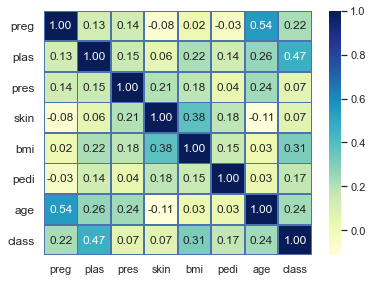

In [27]:
plt.figure(figsize=(6, 4.5))
cor = df.corr()
g = sb.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=0.8, linecolor='b', fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

In [29]:
cols_fts = ['preg', 'plas', 'bmi', 'pedi', 'age']
X = df[cols_fts].copy()
X

preg  plas   bmi   pedi  age
0       6   148  33.6  0.627   50
1       1    85  26.6  0.351   31
2       8   183  23.3  0.672   32
3       1    89  28.1  0.167   21
4       0   137  43.1  2.288   33
..    ...   ...   ...    ...  ...
763    10   101  32.9  0.171   63
764     2   122  36.8  0.340   27
765     5   121  26.2  0.245   30
766     1   126  30.1  0.349   47
767     1    93  30.4  0.315   23

[768 rows x 5 columns]

In [30]:
X['test'] = df['age'] * .7 - df['pedi'] * 9
X.head()

preg  plas   bmi   pedi  age    test
0     6   148  33.6  0.627   50  29.357
1     1    85  26.6  0.351   31  18.541
2     8   183  23.3  0.672   32  16.352
3     1    89  28.1  0.167   21  13.197
4     0   137  43.1  2.288   33   2.508

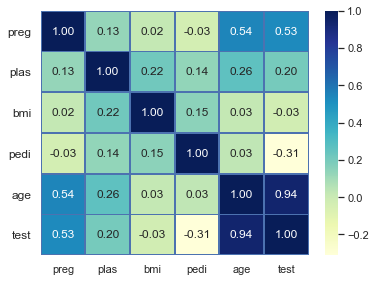

In [31]:
plt.figure(figsize=(6, 4.5))
cor = X.corr()
g = sb.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=0.8, linecolor='b', fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

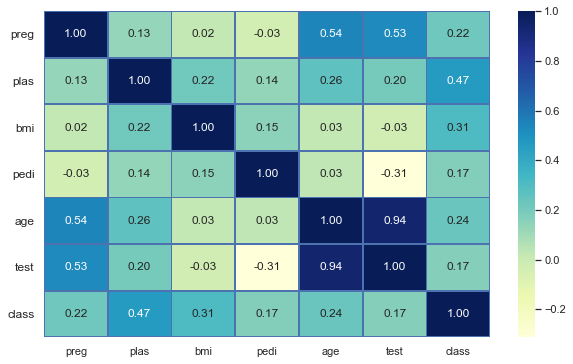

In [34]:
X2 = X.copy()
X2['class'] = df['class']
plt.figure(figsize=(10, 6))
cor = X2.corr()
g = sb.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=0.8, linecolor='b', fmt='.2f')
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

In [36]:
import warnings

In [37]:
warnings.filterwarnings('ignore')

In [38]:
from sklearn.preprocessing import MinMaxScaler as Scaler

In [39]:
X = df.drop('class', axis=1)
sc = Scaler()
X_sc = sc.fit_transform(X)

df_sc = pd.DataFrame(X_sc, columns=X.columns)
df_sc.head().round(3)

preg   plas   pres   skin    bmi   pedi    age
0  0.353  0.744  0.590  0.354  0.315  0.234  0.483
1  0.059  0.427  0.541  0.293  0.172  0.117  0.167
2  0.471  0.920  0.525  0.000  0.104  0.254  0.183
3  0.059  0.447  0.541  0.232  0.202  0.038  0.000
4  0.000  0.688  0.328  0.354  0.509  0.944  0.200

In [41]:
df_sc.var().sort_values(ascending=False).round(5) * 1000

preg    39.29
age     38.42
skin    25.96
plas    25.81
pres    25.17
pedi    20.01
bmi     19.77
dtype: float64

In [42]:
#workshop 3

In [43]:
df['class'] = df['class'].astype('category')

In [44]:
X = df.drop(['class'], axis=1)
X.head(3)

preg  plas  pres  skin   bmi   pedi  age
0     6   148    72    35  33.6  0.627   50
1     1    85    66    29  26.6  0.351   31
2     8   183    64     0  23.3  0.672   32

In [45]:
y = df['class']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: category
Categories (2, int64): [0, 1]

In [47]:
import warnings

warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler as Scaler

In [49]:
sc = Scaler()
X_sc = sc.fit_transform(X)
df_sc = pd.DataFrame(X_sc, columns=X.columns)
df_sc.head()

preg      plas      pres      skin       bmi      pedi       age
0  0.352941  0.743719  0.590164  0.353535  0.314928  0.234415  0.483333
1  0.058824  0.427136  0.540984  0.292929  0.171779  0.116567  0.166667
2  0.470588  0.919598  0.524590  0.000000  0.104294  0.253629  0.183333
3  0.058824  0.447236  0.540984  0.232323  0.202454  0.038002  0.000000
4  0.000000  0.688442  0.327869  0.353535  0.509202  0.943638  0.200000

In [50]:
from sklearn.feature_selection import SelectKBest, chi2

In [51]:
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X_sc, y)

In [53]:
np.set_printoptions(precision=3)
print(fit.scores_)

[6.56  7.095 0.144 0.536 5.073 2.759 8.206]


In [54]:
features = fit.transform(X_sc)
print(features[0:5,:])

[[0.353 0.744 0.315 0.234 0.483]
 [0.059 0.427 0.172 0.117 0.167]
 [0.471 0.92  0.104 0.254 0.183]
 [0.059 0.447 0.202 0.038 0.   ]
 [0.    0.688 0.509 0.944 0.2  ]]


In [55]:
dfts = pd.DataFrame(fit.scores_, columns=['score'])
dfts['column'] = X.columns
dfts.sort_values(by='score', ascending=False)

score column
6  8.205691    age
1  7.094910   plas
0  6.559982   preg
4  5.072897    bmi
5  2.758584   pedi
3  0.536445   skin
2  0.144306   pres

In [56]:
cols_fts = dfts.sort_values(by='score', ascending=False).head(5).column
X_fts = df_sc[cols_fts].copy()
X_fts.shape

(768, 5)

In [57]:
X_fts.columns

Index(['age', 'plas', 'preg', 'bmi', 'pedi'], dtype='object')

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [59]:
model= SVC(kernel='linear')

In [61]:
csv = cross_val_score(model, X_fts, y, cv=10)
print('cross_val_score: {}'.format(csv.round(2)))
print('Average(%): {:.2f}'.format(csv.mean() * 100))

cross_val_score: [0.75 0.79 0.77 0.73 0.75 0.81 0.78 0.79 0.72 0.83]
Average(%): 77.21


In [62]:
#workshop 4

In [63]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

In [64]:
model = LinearSVC()

In [65]:
rfe = RFE(model, 5)
rfe = rfe.fit(X_sc, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True False]
[1 1 1 3 1 1 2]


In [68]:
cols_fts = []
for i,cl in enumerate(X.columns):
    if rfe.support_[i] == True:
        cols_fts.append(cl)
cols_fts

['preg', 'plas', 'pres', 'bmi', 'pedi']

In [69]:
X_fts = df_sc[cols_fts]
X_fts.head()

preg      plas      pres       bmi      pedi
0  0.352941  0.743719  0.590164  0.314928  0.234415
1  0.058824  0.427136  0.540984  0.171779  0.116567
2  0.470588  0.919598  0.524590  0.104294  0.253629
3  0.058824  0.447236  0.540984  0.202454  0.038002
4  0.000000  0.688442  0.327869  0.509202  0.943638

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model= SVC(kernel='linear')
csv = cross_val_score(model, X_fts, y, cv=10)
print('cross_val_score: {}'.format(csv.round(2)))
print('Average(%): {:.2f}'.format(csv.mean() * 100))

cross_val_score: [0.73 0.78 0.79 0.74 0.74 0.79 0.79 0.79 0.71 0.83]
Average(%): 76.95


In [71]:
#workshop 5

In [72]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from time import time

In [73]:
df = sb.load_dataset('iris')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [75]:
X = df.drop('species', axis=1)
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [76]:
y = df['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()

X_sc = sc.fit_transform(X)

In [79]:
sc_df = pd.DataFrame(X_sc, columns=['SL', 'SW', 'PL', 'PW'])
sc_df.head()

SL        SW        PL        PW
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444

In [80]:
df.describe().round(2)

sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.06          3.76         1.20
std            0.83         0.44          1.77         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50

In [81]:
sc_df.describe().round(2)

SL      SW      PL      PW
count  150.00  150.00  150.00  150.00
mean    -0.00   -0.00   -0.00   -0.00
std      1.00    1.00    1.00    1.00
min     -1.87   -2.43   -1.57   -1.45
25%     -0.90   -0.59   -1.23   -1.18
50%     -0.05   -0.13    0.34    0.13
75%      0.67    0.56    0.76    0.79
max      2.49    3.09    1.79    1.71

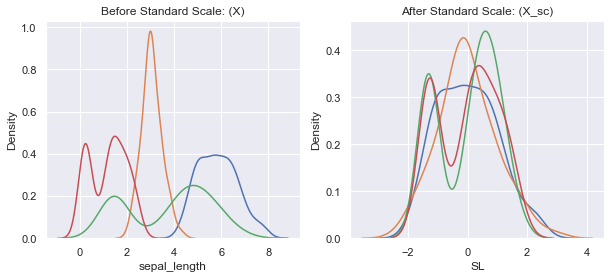

In [83]:
sb.set()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.set_title('Before Standard Scale: (X)')
sb.kdeplot(df['sepal_length'], ax=ax1, label='SL')
sb.kdeplot(df['sepal_width'], ax=ax1, label='SW')
sb.kdeplot(df['petal_length'], ax=ax1, label='PL')
sb.kdeplot(df['petal_width'], ax=ax1, label='PW')

ax2.set_title('After Standard Scale: (X_sc)')
sb.kdeplot(sc_df['SL'], ax=ax2)
sb.kdeplot(sc_df['SW'], ax=ax2)
sb.kdeplot(sc_df['PL'], ax=ax2)
sb.kdeplot(sc_df['PW'], ax=ax2)

plt.show()

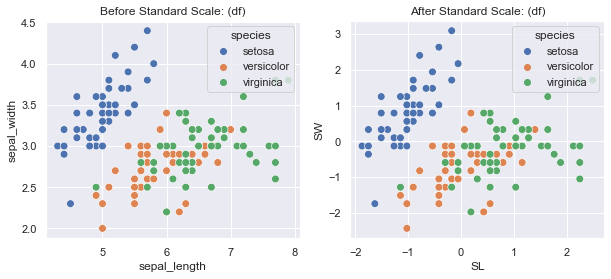

In [86]:
sc_df['species'] = df['species']
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.set_title('Before Standard Scale: (df)')
sb.scatterplot('sepal_length', 'sepal_width', data=df, hue='species', ax=ax1, s=60)

ax2.set_title('After Standard Scale: (df)')
sb.scatterplot('SL', 'SW', data=sc_df, hue='species', ax=ax2, s=60)

plt.show()

In [87]:
#workshop 6

In [88]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA()
X_pca = pca.fit_transform(X_sc)
X_pca[0]

array([-2.265,  0.48 , -0.128, -0.024])

In [95]:
df['pca1'] = X_pca[:,0]
df['pca2'] = X_pca[:,1]
df['pca3'] = X_pca[:,2]
df['pca4'] = X_pca[:,3]
df.head()

sepal_length  sepal_width  petal_length  petal_width species      pca1  \
0           5.1          3.5           1.4          0.2  setosa -2.264703   
1           4.9          3.0           1.4          0.2  setosa -2.080961   
2           4.7          3.2           1.3          0.2  setosa -2.364229   
3           4.6          3.1           1.5          0.2  setosa -2.299384   
4           5.0          3.6           1.4          0.2  setosa -2.389842   

       pca2      pca3      pca4  
0  0.480027 -0.127706 -0.024168  
1 -0.674134 -0.234609 -0.103007  
2 -0.341908  0.044201 -0.028377  
3 -0.597395  0.091290  0.065956  
4  0.646835  0.015738  0.035923

In [96]:
df.describe().round(2)

sepal_length  sepal_width  petal_length  petal_width    pca1    pca2  \
count        150.00       150.00        150.00       150.00  150.00  150.00   
mean           5.84         3.06          3.76         1.20    0.00    0.00   
std            0.83         0.44          1.77         0.76    1.71    0.96   
min            4.30         2.00          1.00         0.10   -2.77   -2.65   
25%            5.10         2.80          1.60         0.30   -2.10   -0.60   
50%            5.80         3.00          4.35         1.30    0.42    0.02   
75%            6.40         3.30          5.10         1.80    1.34    0.59   
max            7.90         4.40          6.90         2.50    3.31    2.69   

         pca3    pca4  
count  150.00  150.00  
mean     0.00    0.00  
std      0.38    0.14  
min     -0.86   -0.47  
25%     -0.26   -0.09  
50%      0.02   -0.01  
75%      0.19    0.07  
max      1.01    0.49

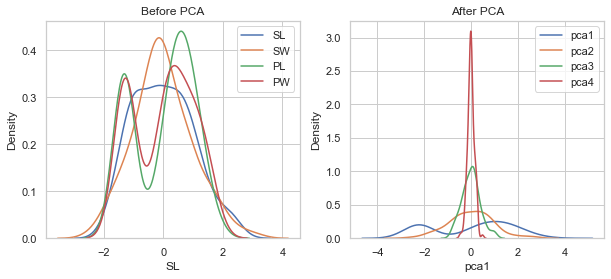

In [107]:
sb.set_style('whitegrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.set_title('Before PCA')
sb.kdeplot(sc_df['SL'], ax=ax1)
sb.kdeplot(sc_df['SW'], ax=ax1)
sb.kdeplot(sc_df['PL'], ax=ax1)
sb.kdeplot(sc_df['PW'], ax=ax1)
ax1.legend(['SL', 'SW', 'PL', 'PW'], loc="upper right")

ax2.set_title('After PCA')
sb.kdeplot(df['pca1'], ax=ax2)
sb.kdeplot(df['pca2'], ax=ax2)
sb.kdeplot(df['pca3'], ax=ax2)
sb.kdeplot(df['pca4'], ax=ax2)
ax2.legend(['pca1', 'pca2', 'pca3', 'pca4'], loc="upper right")

plt.show()

In [109]:
sb.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 5, 5
sb.scatterplot('pca1', 'pca2', data=df, hue='species', s=90)
plt.title('PCA 1-2')
plt.show()

In [110]:
sb.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 5, 5
sb.scatterplot('pca2', 'pca3', data=df, hue='species', s=90)
plt.show()

In [113]:
exp_variance = pca.explained_variance_ratio_
exp_variance

array([0.73 , 0.229, 0.037, 0.005])

In [115]:
sb.set()
plt.rcParams['figure.figsize'] = 4, 4
x = list(range(1, len(exp_variance) + 1))
sb.lineplot(x, exp_variance, marker='s', markersize=8)
plt.xticks(x)
plt.title('Explained Variance')
plt.show()

In [116]:
pca_num = PCA(.95)
pca_num.fit(X)
pca_num.n_components_

2

In [117]:
#workshop 7

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((120, 4), (120,))

In [120]:
X_train[:3]

sepal_length  sepal_width  petal_length  petal_width
137           6.4          3.1           5.5          1.8
84            5.4          3.0           4.5          1.5
27            5.2          3.5           1.5          0.2

In [126]:
pca = PCA()

pca =  PCA(n_components=2)

start = time()

pca.fit(X_sc)

PCA(n_components=2)

In [131]:
X_train_sc = sc.transform(X_train)
X_train_pac = pca.transform(X_train_sc)

X_test_sc = sc.transform(X_test)
X_test_pca = pca.transform(X_test_sc)

print('{:.5f} sec'.format(time() - start))

X_train_pac.shape, X_test_pca.shape

19.64362 sec


((120, 2), (30, 2))

In [132]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [133]:
start = time()

model.fit(X_train_pac, y_train)

print('{:.5f} sec'.format(time() - start))

y_pred = model.predict(X_test_pca)

0.00112 sec


In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [135]:
cm = confusion_matrix(y_test, y_pred)

print('Accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print(cm)

Accuracy score: 0.933
[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


In [139]:
from sklearn.model_selection import cross_val_score
X_pca = pca.transform(X_sc)

cvs = cross_val_score(model, X_pca, y, cv=10)
print('Cross val scroe: {}'.format(cvs.round(2)))

print('Average (%): {:.2f}'.format(cvs.mean() * 100))

Cross val scroe: [0.87 0.93 1.   0.93 0.87 0.8  0.93 0.87 1.   0.93]
Average (%): 91.33


In [140]:
from sklearn.pipeline import Pipeline

In [141]:
n_comp = 3

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_comp)),
    ('linearSvc', SVC(kernel='linear'))
])

pipe.fit(X_train, y_train)
X_new = [
    [4.8, 3.1, 1.6, 0.4],
    [6.8, 3.1, 4.6, 1.4],
    [6.6, 3.1, 5, 2]
]
print(pipe.predict(X_new))

['setosa' 'versicolor' 'virginica']


In [142]:
from sklearn.pipeline import Pipeline

In [143]:
n_comp = 3

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_comp)),
    ('linearSvc', SVC(kernel='linear'))
])

cvs = cross_val_score(pipe, X, y, cv=10)
print('Cross val scroe: {}'.format(cvs.round(2)))

print('Average (%): {:.2f}'.format(cvs.mean() * 100))

Cross val scroe: [1.   1.   1.   1.   0.87 1.   0.87 1.   1.   1.  ]
Average (%): 97.33


In [145]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

digits = datasets.load_digits()

In [146]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [147]:
X.shape

(1797, 64)

In [148]:
y = digits.target
y[:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [149]:
from sklearn.decomposition import PCA

In [150]:
pca = PCA()
X_pca = pca.fit_transform(X)
pca.n_components_

64

In [151]:
exp_variance = pca.explained_variance_ratio_
exp_variance

array([1.489e-01, 1.362e-01, 1.179e-01, 8.410e-02, 5.782e-02, 4.917e-02,
       4.316e-02, 3.661e-02, 3.353e-02, 3.079e-02, 2.372e-02, 2.273e-02,
       1.822e-02, 1.774e-02, 1.467e-02, 1.410e-02, 1.319e-02, 1.248e-02,
       1.018e-02, 9.056e-03, 8.895e-03, 7.971e-03, 7.675e-03, 7.229e-03,
       6.959e-03, 5.961e-03, 5.756e-03, 5.152e-03, 4.895e-03, 4.289e-03,
       3.736e-03, 3.533e-03, 3.367e-03, 3.280e-03, 3.083e-03, 2.938e-03,
       2.566e-03, 2.277e-03, 2.223e-03, 2.114e-03, 1.899e-03, 1.587e-03,
       1.512e-03, 1.406e-03, 1.166e-03, 1.075e-03, 9.641e-04, 7.746e-04,
       5.572e-04, 4.043e-04, 2.099e-04, 8.248e-05, 5.251e-05, 5.052e-05,
       3.300e-05, 1.244e-05, 7.048e-06, 3.014e-06, 1.062e-06, 5.501e-07,
       3.429e-07, 9.507e-34, 9.507e-34, 9.362e-34])

In [152]:
sb.set()
plt.rcParams['figure.figsize'] = 8, 4
x = list(range(1, len(exp_variance)+1))
sb.lineplot(x, exp_variance, marker='s', markersize=4)
plt.title('Explained Variance')
plt.show()

In [155]:
sb.set()
plt.rcParams['figure.figsize'] = 8, 4
x = list(range(1, len(exp_variance)+1))
sb.lineplot(x, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of component')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.show()

In [157]:
pca_num = PCA(.95)
pca_num.fit(X)
pca_num.n_components_

29

In [160]:
n_comp = 2
pca = PCA(n_components=n_comp)
pca.fit(X)
print('Explained variance by %i components: %0.3f' %
      (n_comp, np.sum(pca.explained_variance_ratio_)))

Explained variance by 2 components: 0.285


In [161]:
X_pca = pca.transform(X)
X_pca.shape

(1797, 2)

In [162]:
df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df.head()

PCA1       PCA2
0  -1.259466  21.274883
1   7.957612 -20.768700
2   6.991923  -9.955986
3 -15.906105   3.332464
4  23.306868   4.269061

In [163]:
df['label'] = y
df.head()

PCA1       PCA2  label
0  -1.259466  21.274883      0
1   7.957612 -20.768700      1
2   6.991923  -9.955986      2
3 -15.906105   3.332464      3
4  23.306868   4.269061      4

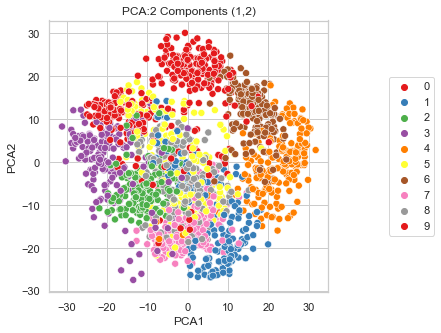

In [165]:
sb.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 5, 5
g = sb.scatterplot('PCA1', 'PCA2', data=df, hue='label', s=50, palette='Set1', legend='full')
g.legend(loc='center right', bbox_to_anchor=(1.4, 0.5), ncol=1)
plt.title('PCA:2 Components (1,2)')
plt.show()

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [176]:
n_comp = 25
pipe = Pipeline([
    ('pca', PCA(n_components=n_comp)),
    ('vsc', SVC(gamma='scale'))
])
pipe.fit(X_train, y_train)

cvs = cross_val_score(pipe, X, y, cv=10)
print('cross_val_score: {}'.format(cvs.round(2)))
print('Average (%): {:.2f}'.format(cvs.mean() * 100))

cross_val_score: [0.95 1.   0.93 0.98 0.99 0.99 0.99 0.99 0.96 0.97]
Average (%): 97.55


In [177]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [180]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy score: 0.9956
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        44
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.98      0.98        47

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 

In [183]:
import scikitplot as skplot

In [184]:
y_pred = pipe.predict(X_test)

skplot.metrics.plot_confusion_matrix(y_test, y_pred, hide_zeros=True)
plt.show()